In [8]:
import tensorflow as tf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

print(train_images.shape)
print(test_images.shape)

#1차원이 아닌 종개수, 행, 열 색상 또는 흑백 형식으로 입력이미지가 색상이면 3, 흑백이면 1
# 즉 CNN을 쓰기전에는 1차원 배열로 만들었지만 CNN에서는 image 정보를 그대로 살림
train_images  = train_images.reshape(train_images.shape[0],28,28, 1).astype('float32') / 255
test_images  = test_images.reshape(test_images.shape[0],28,28,1).astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)


In [10]:
#keras.layers.Flatten - 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 배열(28*28=784 픽셀의 1차원 배열 변환)
#keras.layers.Dense - 마지막 층은 10개 노드의 Softmax 층으로 10개 클라스 중 하나에 속할 확률을 출력(전체 합=1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('정확도 : ', test_acc*100)

#예측(Prediction) 실행
#: 학습된 모델을 사용하여, 이미지에 대한 예측이 가능
#: Test set에 있는 각 이미지의 Label 예측은 10개의 배열로 표시됨.
# 10개의 옷 품목에 상응하는 모델의 신뢰도 중 가장 높은 신뢰도를 찾아야 함

predictions = model.predict(test_images)    
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4979 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3352 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2872 - accuracy: 0.8949
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2602 - accuracy: 0.9039
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2345 - accuracy: 0.9148
313/313 - 2s - loss: 0.2451 - accuracy: 0.9116
정확도 :  91.15999937057495
[1.9664370e-09 1.3714201e-13 2.3238857e-12 4.3746756e-11 1.7980086e-11
 1.2473909e-06 4.8567472e-10 4.8102076e-05 1.3255423e-09 9.9995065e-01]
9


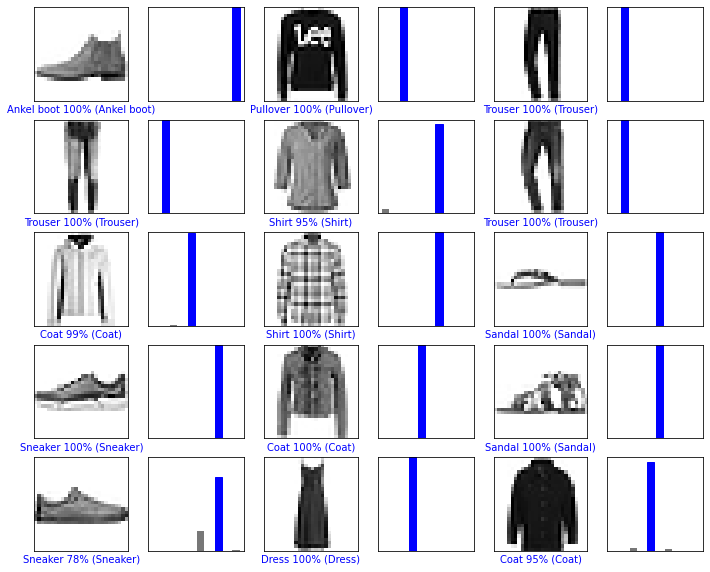

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()